In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from bs4 import BeautifulSoup
import requests
import math
from urllib.request import urlopen, Request
from sklearn.model_selection import train_test_split

import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, multilabel_confusion_matrix

import seaborn as sns

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import tensorflow as tf

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from keras.layers import Dense, Input, LSTM, GRU, Conv1D, MaxPooling1D, Concatenate, Dropout, Flatten, Bidirectional
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tensorflow import keras
from gensim.models import KeyedVectors
from gensim import models
from tensorflow.keras import regularizers

# Library import 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import sklearn.naive_bayes
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.pipeline import Pipeline
import warnings
from gensim.models import Word2Vec

warnings.filterwarnings('ignore')
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/woojaejo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df = pd.read_csv('processed.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [10]:
dmap = {1: 'Positive', -1:'Negative'}
df['Sentiment'] = df['Sentiment'].map(dmap)

In [174]:
X = df['Text']
y = pd.get_dummies(df['Sentiment'])
# y = df['Sentiment'].map(lambda x: 1 if x == 1 else 0)

## Feature Extraction - Vectorization

In [15]:
#Bag of Words
cv = CountVectorizer(ngram_range=(1,1))
bow_X = cv.fit_transform(X).toarray()
# Tfidf
tf = TfidfVectorizer(ngram_range=(1,2))
tf_X = tf.fit_transform(X).toarray()

## Word2Vec Training

In [46]:
# Training the 
test = [i.split() for i in df['Text']]
model = Word2Vec(sentences=test, vector_size=300, window=3, min_count=1, workers=3)

In [47]:
print(model.wv['user'].shape)

(300,)


In [48]:
model.wv.most_similar('trade', topn=10)  # get other similar words

[('short', 0.9996002912521362),
 ('good', 0.9995472431182861),
 ('aap', 0.9995437860488892),
 ('stock', 0.9995434284210205),
 ('today', 0.9995408654212952),
 ('one', 0.9995338320732117),
 ('big', 0.9995330572128296),
 ('still', 0.9995279908180237),
 ('see', 0.9995168447494507),
 ('stocks', 0.9995134472846985)]

## Word2Vec Pretrained

In [160]:
from gensim.models import KeyedVectors
from gensim import models
pretrained = KeyedVectors.load_word2vec_format('https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz',binary=True,limit=100000)

# Neural Network

In [336]:
#Initializing Parameters
max_features = 5000 #Input dimensions
batch_size = 128

In [337]:
#Tokenizing and Padding
tokenizer = Tokenizer(num_words = max_features, oov_token='OOV')
tokenizer.fit_on_texts(X)

sequence = tokenizer.texts_to_sequences(X)
padded = pad_sequences(sequence, maxlen=20)

#Word Dictionary
word_index = tokenizer.word_index
#Vocabulary Size +1 (for NN input)
vocab = len(word_index)+1

In [338]:
padded.shape

(5118, 20)

In [118]:
#Train Test Validation Split
X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.3, random_state=42)    
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_valid.shape, y_valid.shape)

(3582, 20) (3582, 2)
(768, 20) (768, 2)
(768, 20) (768, 2)


In [137]:
#Multilayered Perceptron
nn = Sequential()
nn.add(Input(shape=(20,)))
nn.add(Dense(64, activation = 'relu',))
nn.add(Dense(32, activation = 'relu'))
nn.add(Dropout(0.2))
nn.add(Dense(16, activation = 'relu'))
nn.add(Dense(2, activation = 'softmax'))
print(nn.summary())

nn.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 64)                1344      
_________________________________________________________________
dense_80 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_19 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_81 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_82 (Dense)             (None, 2)                 34        
Total params: 3,986
Trainable params: 3,986
Non-trainable params: 0
_________________________________________________________________
None


In [138]:
history = nn.fit(X_train, y_train, epochs = 50, batch_size = batch_size, verbose =1,
      validation_data=(X_valid, y_valid), validation_split= 0.2)

Epoch 1/50
23/23 [==============================] - 1s 7ms/step - loss: 63.6148 - accuracy: 0.5002 - val_loss: 21.2935 - val_accuracy: 0.6151
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 24.6459 - accuracy: 0.5442 - val_loss: 13.5406 - val_accuracy: 0.6430
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 14.9456 - accuracy: 0.5564 - val_loss: 8.5550 - val_accuracy: 0.6123
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 10.0267 - accuracy: 0.5508 - val_loss: 5.7502 - val_accuracy: 0.5802
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 7.0669 - accuracy: 0.5599 - val_loss: 3.8053 - val_accuracy: 0.5495
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 4.2034 - accuracy: 0.5508 - val_loss: 2.3808 - val_accuracy: 0.4756
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 2.6847 - accuracy: 0.5445 - val_loss: 1.2659 - val_accuracy: 0.6081
Epoch 8/50
23/

#### It seems like the local optimal was found along the way to global minimum and the gap between train and validation loss increases as epochs increase (sign of overfitting)

In [172]:
#Embedding Layer creation
nn = Sequential()
nn.add(Embedding(input_dim = vocab, output_dim = 100, input_length = 20 ))
nn.add(Flatten())
nn.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
nn.add(Dropout(0.4))
nn.add(Dense(32, activation = 'relu'))
nn.add(Dropout(0.5))
nn.add(Dense(2, activation = 'softmax'))
print(rnn.summary())

nn.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 20, 100)           833000    
_________________________________________________________________
flatten_10 (Flatten)         (None, 2000)              0         
_________________________________________________________________
dense_93 (Dense)             (None, 64)                128064    
_________________________________________________________________
dropout_26 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_94 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_27 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_95 (Dense)             (None, 2)               

In [173]:
nn.fit(X_train, y_train, epochs = 20, batch_size = batch_size, verbose = 1,
       validation_data = (X_valid, y_valid))

Epoch 1/20
28/28 [==============================] - 1s 14ms/step - loss: 1.3159 - accuracy: 0.6293 - val_loss: 0.8914 - val_accuracy: 0.6263
Epoch 2/20
28/28 [==============================] - 0s 8ms/step - loss: 0.7517 - accuracy: 0.6334 - val_loss: 0.6778 - val_accuracy: 0.6263
Epoch 3/20
28/28 [==============================] - 0s 12ms/step - loss: 0.6088 - accuracy: 0.6868 - val_loss: 0.6203 - val_accuracy: 0.6810
Epoch 4/20
28/28 [==============================] - 0s 12ms/step - loss: 0.4562 - accuracy: 0.8169 - val_loss: 0.6029 - val_accuracy: 0.7357
Epoch 5/20
28/28 [==============================] - 0s 10ms/step - loss: 0.3098 - accuracy: 0.9213 - val_loss: 0.6513 - val_accuracy: 0.7161
Epoch 6/20
28/28 [==============================] - 0s 9ms/step - loss: 0.2006 - accuracy: 0.9712 - val_loss: 0.6964 - val_accuracy: 0.7266
Epoch 7/20
28/28 [==============================] - 0s 9ms/step - loss: 0.1454 - accuracy: 0.9860 - val_loss: 0.7327 - val_accuracy: 0.7253
Epoch 8/20
28/28

#### Sign of overfitting, accuracy of trainset increases overtime and loss decreases, validation set loss increases at certain point

## Pre-trained Embedding

In [152]:
# Getting the maximum token counts 
def get_max_length(df):

    max_length = 0
    for row in df['Text']:
        if len(row.split(" ")) > max_length:
            max_length = len(row.split(" "))
    return max_length

In [153]:
# This will be the padding length 
get_max_length(df)

23

In [163]:
def embedding_matrix (dimension, vocab_size, word2vec, word_index):
    
    embedding_dim = dimension # Embedding Dimensions
    embedding_matrix = np.zeros((vocab_size, embedding_dim)) #Initializing Embedding Matrix (Weight Matrix for Embedding Layer)
    embedding_vector = 0 #Initialization of vector for each word 

    #Iterate through word_index obtained from Keras
    for word, index in word_index.items():
        try:
            embedding_vector = word2vec[word] #Extract 300dim vector from pretrained word Embedding
        except:
            pass #if the word within the word_index not present, leave it as 0 vector
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector #Place embedding vector into embedding matrix
    print('Embedding Matrix Shape:', embedding_matrix.shape)
    
    return embedding_matrix 

In [166]:
pretrained_embedding = embedding_matrix(300, vocab_size = vocab, word2vec = pretrained, word_index = word_index)

Embedding Matrix Shape: (8330, 300)


In [176]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequence = tokenizer.texts_to_sequences(X)
padding = pad_sequences(sequence, maxlen = 23)

X_train, X_test, y_train, y_test = train_test_split(padding, y, test_size=0.3, random_state=42)    
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_valid.shape, y_valid.shape)

(3582, 23) (3582, 2)
(768, 23) (768, 2)
(768, 23) (768, 2)


In [178]:
# Pretrained Embedding - Multilayered Perceptron
nn = Sequential()
nn.add(Embedding(input_dim = vocab, output_dim = 300, input_length = 23, 
                embeddings_initializer = keras.initializers.Constant(pretrained_embedding),
                trainable = False))
nn.add(Flatten())
nn.add(Dense(64, activation = 'relu'))
nn.add(Dropout(0.5))
nn.add(Dense(32, activation = 'relu'))
nn.add(Dropout(0.5))
nn.add(Dense(2, activation = 'sigmoid'))
print(nn.summary())

nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 23, 300)           2499000   
_________________________________________________________________
flatten_14 (Flatten)         (None, 6900)              0         
_________________________________________________________________
dense_105 (Dense)            (None, 64)                441664    
_________________________________________________________________
dropout_34 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_106 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_35 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_107 (Dense)            (None, 2)               

In [180]:
nn.fit(X_train, y_train, epochs = 30, batch_size = batch_size, verbose = 1, validation_data = (X_valid, y_valid))

Epoch 1/30
28/28 [==============================] - 1s 9ms/step - loss: 0.6656 - accuracy: 0.6131 - val_loss: 0.6407 - val_accuracy: 0.6380
Epoch 2/30
28/28 [==============================] - 0s 6ms/step - loss: 0.6106 - accuracy: 0.6706 - val_loss: 0.6251 - val_accuracy: 0.6562
Epoch 3/30
28/28 [==============================] - 0s 6ms/step - loss: 0.5733 - accuracy: 0.7111 - val_loss: 0.6193 - val_accuracy: 0.6602
Epoch 4/30
28/28 [==============================] - 0s 6ms/step - loss: 0.5139 - accuracy: 0.7644 - val_loss: 0.6343 - val_accuracy: 0.6562
Epoch 5/30
28/28 [==============================] - 0s 5ms/step - loss: 0.4354 - accuracy: 0.8157 - val_loss: 0.6852 - val_accuracy: 0.6549
Epoch 6/30
28/28 [==============================] - 0s 6ms/step - loss: 0.3723 - accuracy: 0.8529 - val_loss: 0.7358 - val_accuracy: 0.6562
Epoch 7/30
28/28 [==============================] - 0s 6ms/step - loss: 0.3057 - accuracy: 0.8878 - val_loss: 0.7935 - val_accuracy: 0.6602
Epoch 8/30
28/28 [==

#### Validation Loss and Train Loss has a large gap in between -> Overfitting

In [231]:
# optimizer = tf.keras.optimizers.Adam(lr=0.0003, decay=1e-6)

In [232]:
# RNN -LSTM
rnn = Sequential()
rnn.add(Embedding(input_dim = vocab, output_dim = 300, input_length = 23, 
                embeddings_initializer = keras.initializers.Constant(pretrained_embedding),
                trainable = False))

rnn.add(SpatialDropout1D(0.5))
rnn.add(LSTM(258, dropout=0.2, recurrent_dropout=0.2))

rnn.add(Dense(2,activation='softmax'))
rnn.compile(loss = 'categorical_crossentropy', optimizer=optimizer ,metrics = ['accuracy'])
print(rnn.summary())

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 23, 300)           2499000   
_________________________________________________________________
spatial_dropout1d_11 (Spatia (None, 23, 300)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 258)               576888    
_________________________________________________________________
dense_121 (Dense)            (None, 2)                 518       
Total params: 3,076,406
Trainable params: 577,406
Non-trainable params: 2,499,000
_________________________________________________________________
None


In [233]:
history = rnn.fit(X_train, y_train, epochs = 20, batch_size = batch_size, verbose = 1, validation_data = (X_valid, y_valid))

Epoch 1/20
28/28 [==============================] - 6s 156ms/step - loss: 0.6558 - accuracy: 0.6245 - val_loss: 0.6423 - val_accuracy: 0.6315
Epoch 2/20
28/28 [==============================] - 4s 147ms/step - loss: 0.6275 - accuracy: 0.6597 - val_loss: 0.6289 - val_accuracy: 0.6484
Epoch 3/20
28/28 [==============================] - 4s 148ms/step - loss: 0.6111 - accuracy: 0.6711 - val_loss: 0.6212 - val_accuracy: 0.6576
Epoch 4/20
28/28 [==============================] - 4s 148ms/step - loss: 0.6057 - accuracy: 0.6790 - val_loss: 0.6168 - val_accuracy: 0.6615
Epoch 5/20
28/28 [==============================] - 4s 146ms/step - loss: 0.5952 - accuracy: 0.6915 - val_loss: 0.6117 - val_accuracy: 0.6628
Epoch 6/20
28/28 [==============================] - 4s 148ms/step - loss: 0.5911 - accuracy: 0.6834 - val_loss: 0.6099 - val_accuracy: 0.6680
Epoch 7/20
28/28 [==============================] - 4s 157ms/step - loss: 0.5935 - accuracy: 0.6946 - val_loss: 0.6094 - val_accuracy: 0.6693
Epoch 

#### Validation loss is fluctuating at certain point, it might reached local minimum, regularization required

In [312]:
#Adding Regularization L1 L2 
rnn = Sequential()
rnn.add(Embedding(input_dim = vocab, output_dim = 300, input_length = 23, 
                embeddings_initializer = keras.initializers.Constant(pretrained_embedding),
                trainable = False))

rnn.add(SpatialDropout1D(0.5))
rnn.add(LSTM(258, dropout=0.2, recurrent_dropout=0.2))
rnn.add(Dense(32, activation = 'relu',kernel_regularizer=regularizers.l1_l2(l1 = 0.01, l2 = 0.01)))
rnn.add(Dropout(0.5))
rnn.add(Dense(2,activation='softmax'))
rnn.compile(loss = 'categorical_crossentropy', optimizer='adam' ,metrics = ['accuracy'])
print(rnn.summary())

Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_64 (Embedding)     (None, 23, 300)           2499000   
_________________________________________________________________
spatial_dropout1d_43 (Spatia (None, 23, 300)           0         
_________________________________________________________________
lstm_60 (LSTM)               (None, 258)               576888    
_________________________________________________________________
dense_175 (Dense)            (None, 32)                8288      
_________________________________________________________________
dropout_63 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_176 (Dense)            (None, 2)                 66        
Total params: 3,084,242
Trainable params: 585,242
Non-trainable params: 2,499,000
_____________________________________

In [239]:
history = rnn.fit(X_train, y_train, epochs = 20, batch_size = batch_size, validation_data = (X_valid, y_valid))

Epoch 1/20
28/28 [==============================] - 6s 168ms/step - loss: 5.9741 - accuracy: 0.6150 - val_loss: 4.8065 - val_accuracy: 0.6263
Epoch 2/20
28/28 [==============================] - 4s 148ms/step - loss: 3.9123 - accuracy: 0.6474 - val_loss: 3.0373 - val_accuracy: 0.6576
Epoch 3/20
28/28 [==============================] - 4s 148ms/step - loss: 2.4031 - accuracy: 0.6575 - val_loss: 1.8028 - val_accuracy: 0.6576
Epoch 4/20
28/28 [==============================] - 5s 164ms/step - loss: 1.4067 - accuracy: 0.6675 - val_loss: 1.0492 - val_accuracy: 0.6562
Epoch 5/20
28/28 [==============================] - 5s 173ms/step - loss: 0.8596 - accuracy: 0.6669 - val_loss: 0.7185 - val_accuracy: 0.6471
Epoch 6/20
28/28 [==============================] - 4s 145ms/step - loss: 0.6837 - accuracy: 0.6365 - val_loss: 0.6728 - val_accuracy: 0.6289
Epoch 7/20
28/28 [==============================] - 4s 147ms/step - loss: 0.6610 - accuracy: 0.6488 - val_loss: 0.6630 - val_accuracy: 0.6510
Epoch 

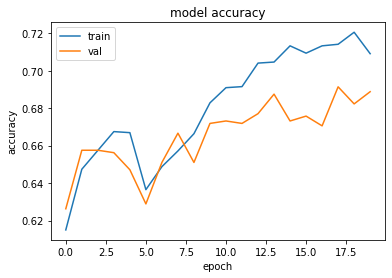

In [244]:
#Plot accuracy Curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


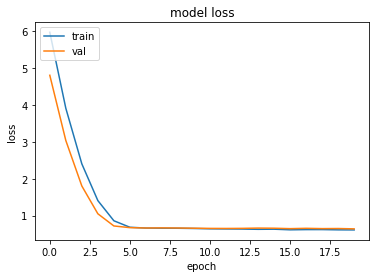

In [243]:
#Plot Loss Curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [248]:
print('model loss {}, model accuracy {}'.format(rnn.evaluate(X_test, y_test, verbose =0)[0], rnn.evaluate(X_test, y_test, verbose = 0)[1]))

model loss0.6169412136077881, model accuracy 0.7057291865348816


### Based on the learning curve, the validation and training loss converges and accuracy increases as more iteration. 

In [304]:
# Bidirectional RNN 
brnn = Sequential()
brnn.add(Embedding(input_dim = vocab, output_dim = 300, input_length = 23, 
                embeddings_initializer = keras.initializers.Constant(pretrained_embedding),
                trainable = False))

brnn.add(Bidirectional(LSTM(32, return_sequences=True)))
brnn.add(SpatialDropout1D(0.4))
brnn.add(Bidirectional(LSTM(16)))
brnn.add(Dropout(0.4))
brnn.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1 = 0.01, l2 = 0.01)))
brnn.add(Dense(2, activation='sigmoid'))

print(brnn.summary())
brnn.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_61 (Embedding)     (None, 23, 300)           2499000   
_________________________________________________________________
bidirectional_43 (Bidirectio (None, 23, 64)            85248     
_________________________________________________________________
spatial_dropout1d_42 (Spatia (None, 23, 64)            0         
_________________________________________________________________
bidirectional_44 (Bidirectio (None, 32)                10368     
_________________________________________________________________
dropout_62 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_169 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_170 (Dense)            (None, 2)               

In [305]:
brnn.fit(X_train, y_train, epochs = 20, batch_size = batch_size, validation_data = (X_test, y_test))

Epoch 1/20
28/28 [==============================] - 7s 110ms/step - loss: 3.3558 - accuracy: 0.6340 - val_loss: 3.0002 - val_accuracy: 0.6419
Epoch 2/20
28/28 [==============================] - 1s 37ms/step - loss: 2.7149 - accuracy: 0.6329 - val_loss: 2.4162 - val_accuracy: 0.6419
Epoch 3/20
28/28 [==============================] - 1s 35ms/step - loss: 2.1682 - accuracy: 0.6329 - val_loss: 1.9151 - val_accuracy: 0.6432
Epoch 4/20
28/28 [==============================] - 1s 35ms/step - loss: 1.7073 - accuracy: 0.6614 - val_loss: 1.5161 - val_accuracy: 0.6966
Epoch 5/20
28/28 [==============================] - 1s 36ms/step - loss: 1.3482 - accuracy: 0.7102 - val_loss: 1.2072 - val_accuracy: 0.6914
Epoch 6/20
28/28 [==============================] - 1s 36ms/step - loss: 1.0587 - accuracy: 0.7278 - val_loss: 0.9865 - val_accuracy: 0.6927
Epoch 7/20
28/28 [==============================] - 1s 37ms/step - loss: 0.8547 - accuracy: 0.7379 - val_loss: 0.8296 - val_accuracy: 0.6927
Epoch 8/20
2

In [310]:
#Convolutional Layer
cnn = Sequential()
cnn.add(Embedding(input_dim = vocab, output_dim = 300, input_length = 23, 
                embeddings_initializer = keras.initializers.Constant(pretrained_embedding),
                trainable = False))

cnn.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(10, activation='relu'))
cnn.add(Dense(2, activation='sigmoid'))
print(cnn.summary())

cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_63 (Embedding)     (None, 23, 300)           2499000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 32)            76832     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 32)             0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_173 (Dense)            (None, 10)                2570      
_________________________________________________________________
dense_174 (Dense)            (None, 2)                 22        
Total params: 2,578,424
Trainable params: 79,424
Non-trainable params: 2,499,000
______________________________________

In [311]:
cnn.fit(X_train, y_train, epochs = 20, batch_size = batch_size, validation_data = (X_test, y_test))

Epoch 1/20
28/28 [==============================] - 1s 15ms/step - loss: 0.6566 - accuracy: 0.6265 - val_loss: 0.6274 - val_accuracy: 0.6471
Epoch 2/20
28/28 [==============================] - 0s 12ms/step - loss: 0.5838 - accuracy: 0.6935 - val_loss: 0.6079 - val_accuracy: 0.6758
Epoch 3/20
28/28 [==============================] - 0s 12ms/step - loss: 0.4894 - accuracy: 0.7775 - val_loss: 0.6008 - val_accuracy: 0.7057
Epoch 4/20
28/28 [==============================] - 0s 12ms/step - loss: 0.3627 - accuracy: 0.8565 - val_loss: 0.6151 - val_accuracy: 0.7018
Epoch 5/20
28/28 [==============================] - 0s 12ms/step - loss: 0.2464 - accuracy: 0.9249 - val_loss: 0.6697 - val_accuracy: 0.6862
Epoch 6/20
28/28 [==============================] - 0s 11ms/step - loss: 0.1557 - accuracy: 0.9637 - val_loss: 0.7409 - val_accuracy: 0.7083
Epoch 7/20
28/28 [==============================] - 0s 11ms/step - loss: 0.0945 - accuracy: 0.9821 - val_loss: 0.8139 - val_accuracy: 0.6797
Epoch 8/20
28

## Conclusion
- It seems like many of the models are overfitting due to the environment of neural network, we have tried many regularization techniques such as Dropout layers (Default and Spatial) L1 and L2 regularization, alternating learning rate and scheduling learning rate (Exponential Decay at certain point). 
- Performance of LSTM worked the best and with the least model complexity